# Random Variables and Probability Distributions

A random variable is a mathematical formalization of a quantity or object which depends on random events. It is a mapping or a function from possible outcomes in a sample space to a measurable space. It is common to consider the special cases of discrete random variables and absolutely continuous random variables, corresponding to whether a random variable is valued in a discrete set (such as a finite set) or in an interval of real numbers.

# Discrete Probability Distributions

Discrete means there are several separate and distinct groups to which a value may belong, whereas continuous values have an infinite amount of points along an unbroken function.

## Bernoulli Distribution

<p>A discrete distribution that covers a case where an event will have a binary outcome (0 or 1) is Bernoulli distributed. The probability of an event is represented by p, whereas the probability of the complimentary non-event is 1-p. The repetition of multiple Bernoulli trials is called a Bernoulli process, and the outcomes of a Bernoulli process will follow a binomial distribution.</p>

<p>The probability mass function is defined as:</p>

$$p(y) = p^yq^{1-y}$$

## Binomial Distribution

The result of a Bernoulli trial repeated n times follows a binomial distribution. A Binomial variable $y$ is the number of successes in these $n$ trials. Characteristics of a binomial experiment are:</p>

<ul>
    <li>Consists of $n$ equivalent trials, independent of each other</li>
    <li>There are only two potential outcomes of a single trial</li>
    <li>The probability of obtaining $Y$ (or 1) is the same from trial to trial</li>
    <li>The random variable $y$ is the number of successes in the total of $n$ trials</li>
</ul>

The probability mass function is:

<p>$$P(y) = \begin{bmatrix} n \\ y \\ \end{bmatrix} p^yq^{n-y}$$</p>
<ul>
    <li>$p$ is the probability of failure in a single trial, and $q = 1-p$</li>
</ul>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_theme(style="darkgrid")

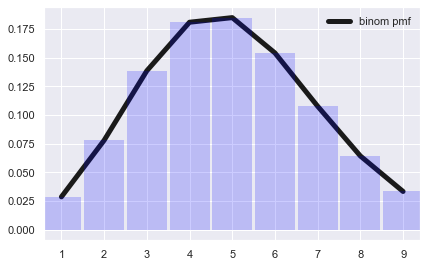

In [2]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)

n, p = 50, 0.1

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'k-', lw=5, ms=8, label='binom pmf')

ax.vlines(x, 0, binom.pmf(x, n, p), lw=40, alpha=0.2, color="blue")

ax.legend(loc='best', frameon=False)
plt.show()

## Hypergeometric Distribution

The result of each draw from a hypergeometric distribution can be classified into 1 of 2 mutually exclusive categories, sampling without replacement from a finite population.

Assume a set of size $N$ with $R$ successes. A single trial has only 2 outcomes, but the set is finite, and each trial depends on the outcomes of previous trials. The random variable $y$ is the number of successes in a sample of size $n$ drawn from the source set of size $N$.

A random X follows the hypergeometric distribution if its PMF is:

$$P(y) = \frac {\begin{bmatrix} R \\ y \\ \end{bmatrix} \begin{bmatrix} N-R \\ n-y \\ \end{bmatrix}} {\begin{bmatrix} N \\ n\\ \end{bmatrix}} $$

<ul>
    <li>$N$ is the size of the source set</li>
    <li>$n$ is the size of the sample</li>
    <li>$R$ is the number of successful trials in the source set</li>
    <li>$Y$ is the number of successful trials in the example</li>
</ul>

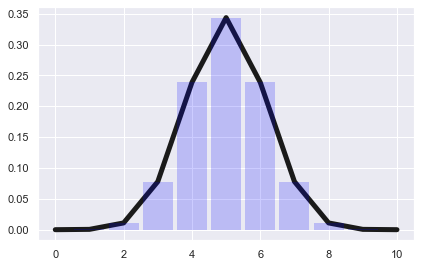

In [3]:
from scipy.stats import hypergeom
fig, ax = plt.subplots(1, 1)

[M, n, N] = [20, 10, 10]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

ax.plot(x, pmf_dogs, 'k-', lw=5)
ax.vlines(x, 0, pmf_dogs, lw=30, color='blue', alpha=0.2)
plt.show()

## Poisson Distribution

The Poisson distribution is a model for the relative frequency of rare events and data defined as counts. It is often used to determine the probability that some event will happen at a specific time, volume, or area. 
    
A Poisson process is a model for a series of discrete events where the average time between events is known, but the exact timing is unknown.  It expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. If the probability that some event will occur is equal for any part of time, volume, or area, and the expected number of events is $\lambda$, then the probability function is:</p>

<p>$$P(y) = \frac{e^{-\lambda}\lambda^y}{y!}$$</p>
<ul>
    <li>$\lambda$ is the average number of successes given time</li>
</ul>

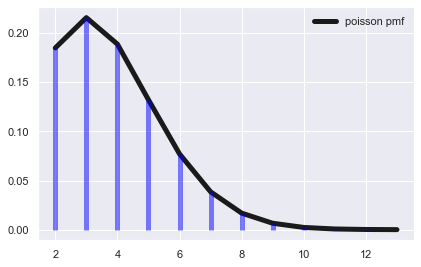

In [4]:
from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)

mu = 3.5


x = np.arange(poisson.ppf(0.01, mu*2),
              poisson.ppf(0.99, mu*2))
ax.plot(x, poisson.pmf(x, mu), 'k-', ms=8, label='poisson pmf', lw=5)
ax.vlines(x, 0, poisson.pmf(x, mu), color='blue', lw=5, alpha=0.5)

rv = poisson(mu, 100)
ax.vlines(x, 0, rv.pmf(x), colors='blue', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

# Continuous Probability Distrbutions

With continuous probability distributions, a random variable is not constrained to taking on one of a discrete set of values. It can lie anywhere in a continuous range, represented by the black lines in the charts below. The apparent discretizing of the purple bars is a function of displaying sampled values with arbitrary histogram bin sizes. 

## Uniform Distribution

The uniform distribution is quite simple to explain; it theoretically takes on a constant value, illustrated by the black line in the chart below. Sampling variability from this mean can exist, however, as illustrated by the purple bars.

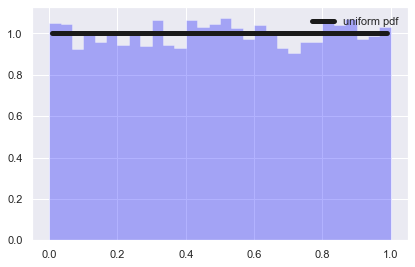

In [5]:
from scipy.stats import uniform

fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 10000)
ax.plot(x, uniform.pdf(x), 'k-', lw=5, label='uniform pdf')

vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

r = uniform.rvs(size=10000)

ax.hist(r, bins=30, density=True, histtype='stepfilled', alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

## Normal Distribution

The normal distribution’s location and form are determined by two parameters, the mean and variance ($\mu$ and $\sigma^2$). The probability density function (PDF) is:

$$f(y)=\frac{1}{\sqrt{2\pi\sigma^2}} e\frac{-(y-\mu)^2} {2\sigma^2}$$

In the standard normal distribution, the mean, median and mode are equal. The shape of the normal curve depends only on the standard deviation, so all normal curves can be standardized such that $\mu = 0$ and $\sigma = 1$. A density function of the <i>standard</i> normal variable is:</p>

$$f(z) = e^{-1/2z^2}\text{/}\sqrt{2\pi}$$

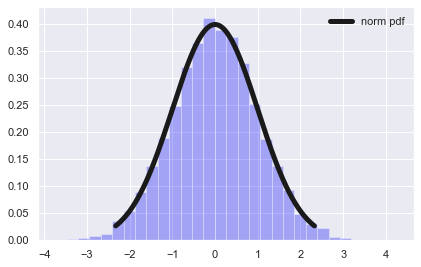

In [6]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 10000)
ax.plot(x, norm.pdf(x), 'k-', lw=5, label='norm pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

r = norm.rvs(size=10000)

ax.hist(r, bins=30, density=True, alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

<p>The Central Limit Theorem (CLT) asserts that sample means of sizeable samples will tend to form Gaussian distributions. The CLT is important toward making inferences in machine learning, and will tend to hold true (demonstrably) regardless of the distribution type(s) being sampled from.</p>

## Chi-Square Distribution

Consider a set of standard normal variables $z_i$, where $i = 1, ..., z$, that are IID with mean $\mu=0$ and standard deviation $\sigma=1$. Define a random variable: $\chi^2 = \sum_iz_i^2$, $~for~ i = 1, ... \nu~\text{degrees of freedom}$. The variable chi-squared has a chi-square distribution with $\nu$ (nu) degrees of freedom. The number of degrees of freedom dictate the shape.

$$f(x,k) = \frac{1}{2^{k/2}\gamma(k/2)} x^{k/2-1} exp(-x/2)$$

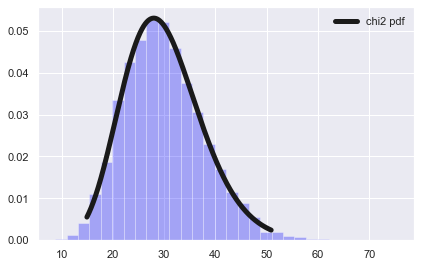

In [7]:
from scipy.stats import chi2

fig, ax = plt.subplots(1, 1)

df = 30

x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 10000)
ax.plot(x, chi2.pdf(x, df), 'k-', lw=5, label='chi2 pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

r = chi2.rvs(df, size=10000)

ax.hist(r, bins=30, density=True, alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

## T-Distribution

T-Distributions are often witnessed when sampling from data that are approximately Gaussian, and this phenomena makes for a useful shortcut when describing uncertainty or error, related to sampling for the purpose of estimating population statistics. Compared to the standard Gaussian distribution, it shows longer tails and taller shoulders.

Whereas the Gaussian distribution has 2 parameters (mean and variance), the t-distribution only has one - the number of degrees of freedom. Degrees of freedom equate to the number of pieces of information used to describe a population quantity. For example, the mean has n degrees of freedom, since all n observations in the sample are used to calculate the estimate of the population mean.

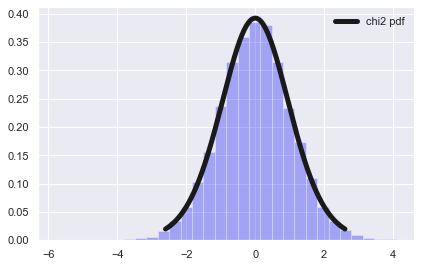

In [8]:
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = 15

x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 10000)
ax.plot(x, t.pdf(x, df), 'k-', lw=5, label='chi2 pdf')

vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

r = t.rvs(df, size=10000)

ax.hist(r, bins=30, density=True, alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

## F-Distribution

<p>Let $\chi_1^2$ and $\chi_2^2$ be two independent chi-square random variables with $\nu_1$ and $\nu_2$ degrees of freedom respectively. Then,</p>

<p>$$F = \frac{\chi_1^2\text{/}\nu_1}{\chi_2^2\text{/}\nu_2}$$</p>

<p>is a random variable with degrees of freedom $\nu_1$ and $\nu_2$. The shape of the F distribution depends on the degrees of freedom.</p>

<p>$$E(F) = \frac{\nu_2}{\nu_2-2}\left(1 + \frac{2\lambda}{\nu_1}\right)$$</p>

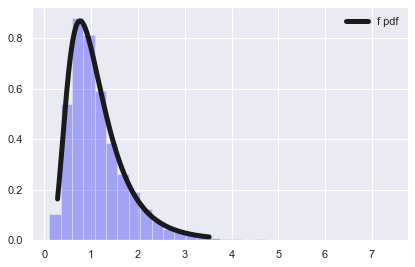

In [9]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd = 15, 15

x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 10000)
ax.plot(x, f.pdf(x, dfn, dfd),
       'k-', lw=5, label='f pdf')

rv = f(dfn, dfd)

vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd))

r = f.rvs(dfn, dfd, size=10000)

ax.hist(r, bins=30, density=True, alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

## Exponential Distribution

The exponential probability distribution is a continuous probability distribution where a few outcomes are the most likely, with a rapid decrease in probability to all other outcomes. It’s discrete counterpart is the ‘geometric’ distribution.

It describes the waiting time until the next event in a Poisson process. If a series of events (e.g., births) are equally likely to occur at any time, then the distribution of interarrival times tends to be exponential. If a Poisson process describes the frequency of calls at a call-center per hour, then the exponential distribution can be used to model the time between calls.

The PDF of the exponential distribution is:

$$f(x) = exp(-x)$$

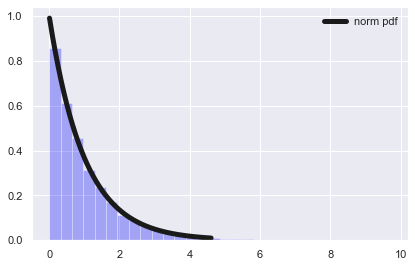

In [10]:
from scipy.stats import expon

fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 10000)
ax.plot(x, expon.pdf(x), 'k-', lw=5, label='norm pdf')

vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

r = expon.rvs(size=10000)

ax.hist(r, bins=30, density=True, alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

## Gamma Distribution

The gamma distribution is used to model continuous variables that are always positive and have skewed distributions. Like the exponential distribution, it can be thought of as waiting time between Poisson-distributed events. In fact, the exponential distribution and chi-squared distribution are special cases of the gamma distribution.

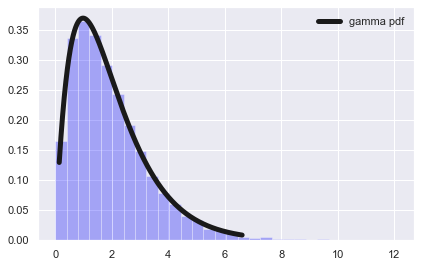

In [11]:
from scipy.stats import gamma

fig, ax = plt.subplots(1, 1)

a = 1.99

x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 10000)
ax.plot(x, gamma.pdf(x, a),
       'k-', lw=5, label='gamma pdf')

rv = gamma(a)

vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))

r = gamma.rvs(a, size=10000)

ax.hist(r, bins=30, density=True, alpha = 0.3, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()

## Log-Normal Distribution

If the logarithm of a set of values have a normal distribution, the values are said to have a lognormal distribution. If a sample is approximately lognormal, and you plot its CDF on a log-x scale, it will have the characteristic shape of a normal distribution. The cumulative distribution function (CDF) of the lognormal distribution is the same as the CDF of the normal distribution, except with log(x) substituting for x.

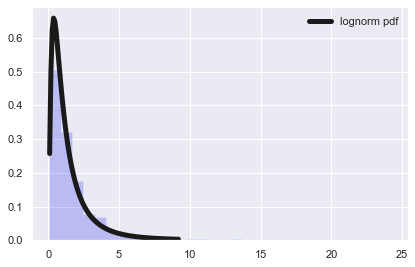

In [12]:
from scipy.stats import lognorm

fig, ax = plt.subplots(1, 1)

s = 0.954
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),
       'k-', lw=5, label='lognorm pdf')

vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))

r = lognorm.rvs(s, size=1000)

ax.hist(r, bins=30, density=True, histtype='stepfilled', alpha=0.2, color="blue")
ax.legend(loc='best', frameon=False)
plt.show()